## Building Flexible Trees

In [1]:
from imports import *
np.random.seed(20090403)

Again we consider a toy affinity for demonstration purposes. We take $A(i,j) \sim \exp{\left(-\frac{\left|{x_i-x_j}\right|^2}{100}\right)}$, where points are drawn from a Gaussian with mean 5 for nodes 0-20, 15 for nodes 21-41, and 25 for nodes 42-63, and standard deviation 3. 

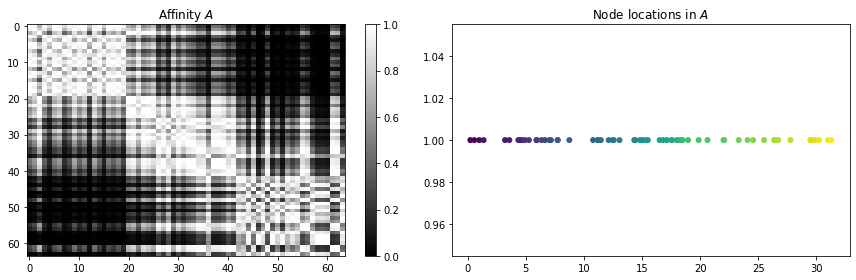

In [2]:
A = np.zeros([64,64])
means = [5.0,15.0,25.0]
sigma = 3.0
locs = np.zeros(64)
locs[0:21] = np.random.normal(means[0],sigma,21)
locs[21:42] = np.random.normal(means[1],sigma,21)
locs[42:] = np.random.normal(means[2],sigma,22)
for i in range(64):
    for j in range(64):
        d_ij = locs[i]-locs[j]
        A[i,j] = np.exp(-(d_ij**2.0)/100.0)
fig = plt.figure(figsize=(12,4))
fig.add_subplot(121)
bwplot(A,colorbar=True,title="Affinity $A$")
fig.add_subplot(122)
leafcolors = np.arange(-1.0,1.0,2.0/64.0)[locs.argsort().argsort()]
plt.scatter(locs,np.ones(len(locs),np.int),c=leafcolors,edgecolors='none')
plt.title("Node locations in $A$")
plt.tight_layout()
plt.show()

We next construct some flexible trees with different tree constants on $A$. We see that higher values of $c$ give rise to trees which are taller and more hierarchical, while lower values lead to flatter trees, as we would expect.

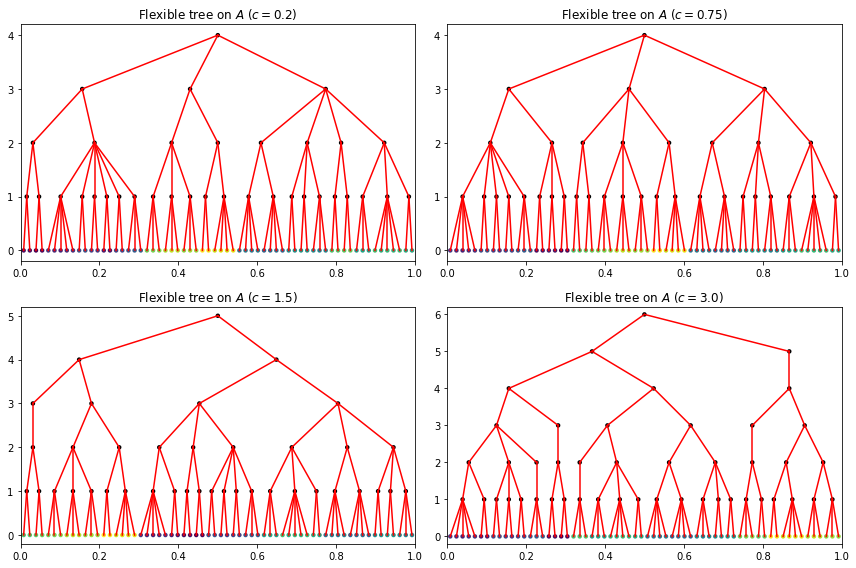

In [3]:
fig = plt.figure(figsize=(12,8))
trees = []
for idx,tree_constant in enumerate([0.2,0.75,1.5,3.0]):
    trees.append(flex_tree_build.flex_tree_diffusion(A,tree_constant))
    fig.add_subplot(2,2,idx+1)
    plot_tree(trees[idx],leafcolors=leafcolors,
              title="Flexible tree on $A$ ($c={}$)".format(tree_constant))
plt.tight_layout()
plt.show()